检测自适应程序是否有效，即结果是否收敛。

**方法**
- 绘制相干性比例变化曲线
  - 观察相干性比例在实验过程中的变化趋势
- 变异系数变化曲线
  - 量化相干性比例的波动程度，判断是否趋于稳定
  - 步骤
    - 将实验分为多个阶段（如每 50个试次 为一个阶段）。
    - 计算每个阶段的相干性比例的 均值 和 标准差。
    - 计算变异系数（Coefficient of Variation, CV = 标准差/均值）
    - 观察变异系数是否随实验进程逐渐减小
- 自适应程序的收敛性分析
  - 计算每个被试在实验后期的平均相干性比例（最后 48 个试次）
  - 较该值与心理测量函数拟合的 85% 和 65% 正确率对应的相干性比例

## 相干性比例变化曲线

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "../3_2_pilot_expt_v3/output/df_new.csv"

# 使用 read_csv 函数读取CSV文件，指定分隔符为空格
df = pd.read_csv(path, sep=' ')

df

,Participant_ID,judge_type,difficulty,coherence,target_color_proportion,trial_num
0,1,color,easy_formal,0.0,0.80000,1
1,1,color,easy_formal,0.0,0.80000,2
2,1,color,easy_formal,0.0,0.80000,3
3,1,color,easy_formal,0.0,0.80000,4
4,1,color,easy_formal,0.0,0.80000,5
...,...,...,...,...,...,...
4779,5,color,hard_formal,0.0,0.53625,233
4780,5,color,hard_formal,0.0,0.53625,234
4781,5,color,hard_formal,0.0,0.53625,235
4782,5,color,hard_formal,0.0,0.53625,236


In [6]:
window_size = 24

# 创建一个空的'rolling_mean'列
df['rolling_mean'] = None

# 按照'Participant_ID'和'judge_type'分组
groups = df.groupby(['Participant_ID', 'judge_type'])

for name, group in groups:
    if name[1] == 'motion':  # 运动条件
        # 计算滑动平均并赋值给'rolling_mean'列
        df.loc[(df['Participant_ID'] == name[0]) & (df['judge_type'] == name[1]), 'rolling_mean'] = \
            group['coherence'].rolling(window=window_size, min_periods=1).mean()
    elif name[1] == 'color':  # 颜色条件
        df.loc[(df['Participant_ID'] == name[0]) & (df['judge_type'] == name[1]), 'rolling_mean'] = \
            group['target_color_proportion'].rolling(window=window_size, min_periods=1).mean()


df

,Participant_ID,judge_type,difficulty,coherence,target_color_proportion,trial_num,rolling_mean
0,1,color,easy_formal,0.0,0.80000,1,0.8
1,1,color,easy_formal,0.0,0.80000,2,0.8
2,1,color,easy_formal,0.0,0.80000,3,0.8
3,1,color,easy_formal,0.0,0.80000,4,0.8
4,1,color,easy_formal,0.0,0.80000,5,0.8
...,...,...,...,...,...,...,...
4779,5,color,hard_formal,0.0,0.53625,233,0.537083
4780,5,color,hard_formal,0.0,0.53625,234,0.536875
4781,5,color,hard_formal,0.0,0.53625,235,0.536667
4782,5,color,hard_formal,0.0,0.53625,236,0.536458


分面绘制

还要分不同难度水平，每个被试单独绘制

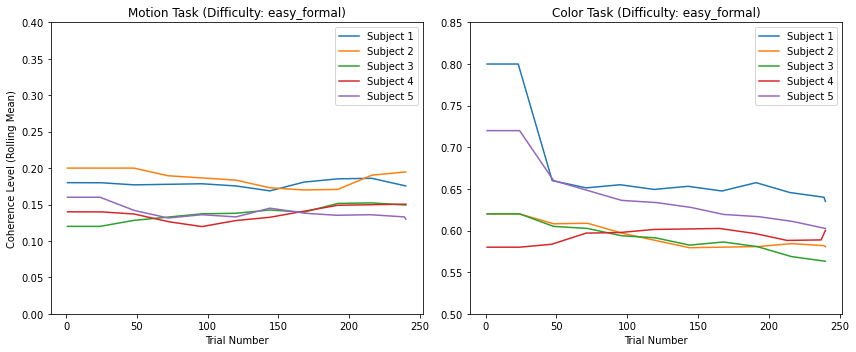

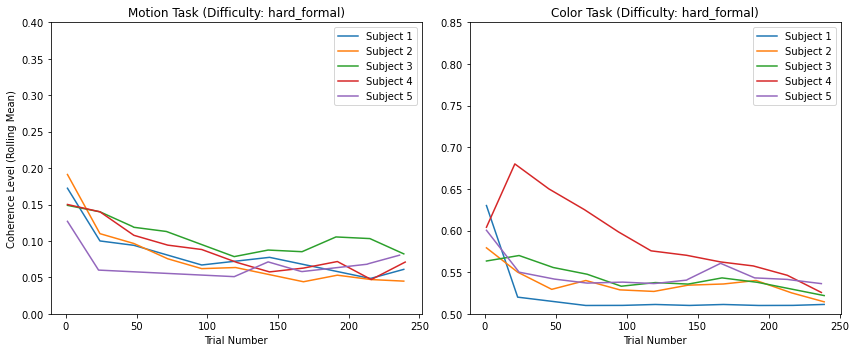

In [7]:
# 根据难度水平分组
difficulty_levels = df['difficulty'].unique()

# 分别指定运动任务和颜色任务的 y 轴范围
motion_ylim = (0, 0.4)  
color_ylim = (0.5, 0.85)  

# 遍历每个难度水平
for difficulty in difficulty_levels:
    # 创建子图
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)  # 取消共享 y 轴

    # 筛选当前难度水平的数据
    difficulty_df = df[df['difficulty'] == difficulty]

    # 绘制运动任务
    motion_data = difficulty_df[difficulty_df['judge_type'] == 'motion']
    for subject_id, subject_data in motion_data.groupby('Participant_ID'):
        axes[0].plot(subject_data['trial_num'], subject_data['rolling_mean'],
                     label=f'Subject {subject_id}')
    axes[0].set_xlabel('Trial Number')
    axes[0].set_ylabel('Coherence Level (Rolling Mean)')
    axes[0].set_title(f'Motion Task (Difficulty: {difficulty})')
    axes[0].legend()
    axes[0].set_ylim(motion_ylim)  # 设置运动任务子图的 y 轴范围

    # 绘制颜色任务
    color_data = difficulty_df[difficulty_df['judge_type'] == 'color']
    for subject_id, subject_data in color_data.groupby('Participant_ID'):
        axes[1].plot(subject_data['trial_num'], subject_data['rolling_mean'],
                     label=f'Subject {subject_id}')
    axes[1].set_xlabel('Trial Number')
    axes[1].set_title(f'Color Task (Difficulty: {difficulty})')
    axes[1].legend()
    axes[1].set_ylim(color_ylim)  # 设置颜色任务子图的 y 轴范围

    plt.tight_layout()
    plt.show()

由图可知，在不同难度的运动和颜色任务中，随着试验次数的增加，相干性比例最终都有趋于稳定的趋势，表明程序在运行过程中表现出收敛的特性。

## 变异系数变化曲线

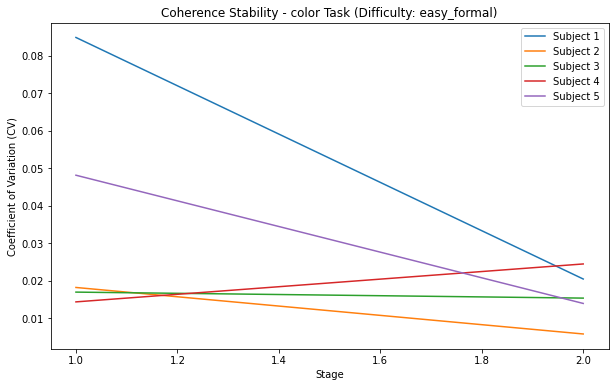

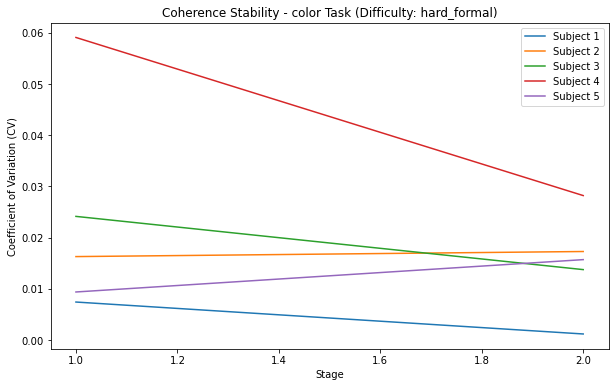

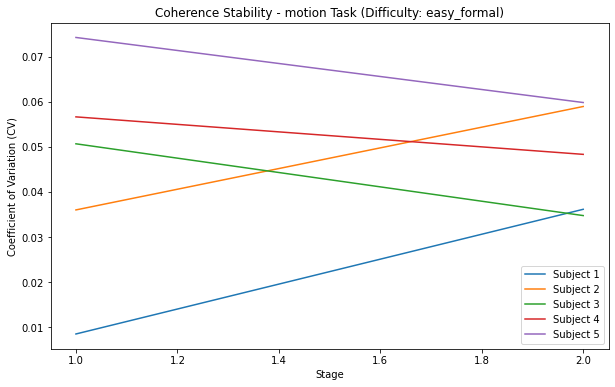

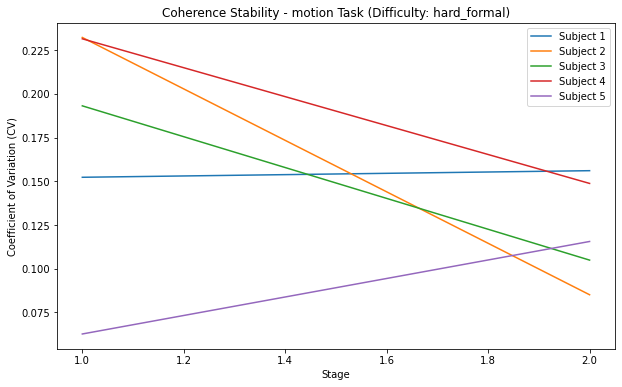

In [22]:
# 将实验分为多个阶段
num_stages = 2  # 分为2个阶段，前期与后期
df['stage'] = pd.cut(df['trial_num'], bins=num_stages, labels=np.arange(1, num_stages + 1))

# 假设'motion'任务的相干性变量名为'coherence'，'color'任务的相干性变量名为'target_color_proportion'
# 可以根据实际情况修改这个映射关系
coherence_var_mapping = {
   'motion': 'coherence',
    'color': 'target_color_proportion'
}

# 计算每个阶段的变异系数
cv_data_list = []
for task_type in coherence_var_mapping.keys():
    var_name = coherence_var_mapping[task_type]
    temp_cv_data = df.groupby(['Participant_ID','stage', 'judge_type', 'difficulty'])[var_name].agg(
        mean='mean',
        std='std'
    ).reset_index()
    temp_cv_data['cv'] = temp_cv_data['std'] / temp_cv_data['mean']
    cv_data_list.append(temp_cv_data)
cv_data = pd.concat(cv_data_list)

# 提取不同的任务类型、难度和被试ID
task_types = cv_data['judge_type'].unique()
difficulties = cv_data['difficulty'].unique()
subject_ids = cv_data['Participant_ID'].unique()

# 遍历不同的任务类型
for task_type in task_types:
    # 遍历不同的难度
    for difficulty in difficulties:
        plt.figure(figsize=(10, 6))
        # 遍历不同的被试
        for subject_id in subject_ids:
            subset_data = cv_data[(cv_data['judge_type'] == task_type) &
                                  (cv_data['difficulty'] == difficulty) &
                                  (cv_data['Participant_ID'] == subject_id)]
            if not subset_data.empty:
                plt.plot(subset_data['stage'], subset_data['cv'], label=f'Subject {subject_id}')
        plt.xlabel('Stage')
        plt.ylabel('Coefficient of Variation (CV)')
        plt.title(f'Coherence Stability - {task_type} Task (Difficulty: {difficulty})')
        plt.legend()
        plt.show()

结果显示，颜色的容易和困难条件以及运动容易条件，后期变异系数都控制在了 10% 以内。运动困难条件的变异系数在 20% 以内。

## 程序的收敛性分析

这里可以考虑做个 *t* 检验

In [25]:
# 计算实验后期的平均相干性比例
late_stage_data = df[df['trial_num'] > 50].groupby('Participant_ID')['coherence'].mean()

# 假设目标相干性比例为 0.3 和 0.5
target_coherence = {'85%': 0.5, '65%': 0.3}

# 比较实验后期均值与目标值
for subject_id, mean_coherence in late_stage_data.items():
    print(f'Subject {subject_id}: Late-stage mean coherence = {mean_coherence:.3f}')
    for target_name, target_value in target_coherence.items():
        print(f'  Difference from {target_name} target: {abs(mean_coherence - target_value):.3f}')

Subject 1: Late-stage mean coherence = 0.061
  Difference from 85% target: 0.439
  Difference from 65% target: 0.239
Subject 2: Late-stage mean coherence = 0.059
  Difference from 85% target: 0.441
  Difference from 65% target: 0.241
Subject 3: Late-stage mean coherence = 0.059
  Difference from 85% target: 0.441
  Difference from 65% target: 0.241
Subject 4: Late-stage mean coherence = 0.052
  Difference from 85% target: 0.448
  Difference from 65% target: 0.248
Subject 5: Late-stage mean coherence = 0.050
  Difference from 85% target: 0.450
  Difference from 65% target: 0.250
